# 两层ReLU拟合任意函数

## 导入相应包

In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

## 定义目标函数

In [57]:
def target_function(x):
    return np.sin(x) + 0.5 * np.cos(2 * x)

## 生成训练集和测试集

In [58]:
# 训练集采样
train_x = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)
train_y = target_function(train_x)

# 测试集采样
test_x = np.linspace(-2 * np.pi, 2 * np.pi, 200).reshape(-1, 1)
test_y = target_function(test_x)

## 定义模型

In [59]:
class myModel:
    def __init__(self):
        # 声明模型对应的参数
        # 假设输入大小为 1，输出大小为 1
        # 隐藏层大小可以自定义，这里我们设置为 64
        self.W1 = tf.Variable(tf.random.normal([1, 64], stddev=0.03), name='W1')
        self.b1 = tf.Variable(tf.random.normal([64]), name='b1')

        self.W2 = tf.Variable(tf.random.normal([64, 64], stddev=0.03), name='W2')
        self.b2 = tf.Variable(tf.random.normal([64]), name='b2')

        self.W3 = tf.Variable(tf.random.normal([64, 1], stddev=0.03), name='W3')
        self.b3 = tf.Variable(tf.random.normal([1]), name='b3')

    def __call__(self, x):
        # 实现模型函数体，返回预测值
        # 第一层
        z1 = tf.add(tf.matmul(x, self.W1), self.b1)
        a1 = tf.nn.relu(z1)

        # 第二层
        z2 = tf.add(tf.matmul(a1, self.W2), self.b2)
        a2 = tf.nn.relu(z2)

        # 输出层
        output = tf.add(tf.matmul(a2, self.W3), self.b3)
        return output


model = myModel()

optimizer = optimizers.Adam()

## 定义损失函数

In [60]:
def compute_loss(predictions, labels):
    """
    计算均方误差损失：
    - predictions: 模型输出
    - labels: 真实标签
    """
    return tf.reduce_mean(tf.square(predictions - labels))

## 定义训练步骤

In [61]:
def train_one_step(model, optimizer, x, y):
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = tf.reduce_mean(tf.square(predictions - y))
    gradients = tape.gradient(loss, [model.W1, model.b1, model.W2, model.b2, model.W3, model.b3])
    optimizer.apply_gradients(zip(gradients, [model.W1, model.b1, model.W2, model.b2, model.W3, model.b3]))
    return loss

## 测试模型

In [62]:
def test(model, x, y):
    predictions = model(x)
    loss = tf.reduce_mean(tf.square(predictions - y))
    return loss

## 主程序

epoch 0 : loss 0.73828334
epoch 100 : loss 0.54195726
epoch 200 : loss 0.51864475
epoch 300 : loss 0.3579266
epoch 400 : loss 0.06638776
epoch 500 : loss 0.013812111
epoch 600 : loss 0.0056056725
epoch 700 : loss 0.004241519
epoch 800 : loss 0.0041756956
epoch 900 : loss 0.0038189618
test loss 0.0037663921


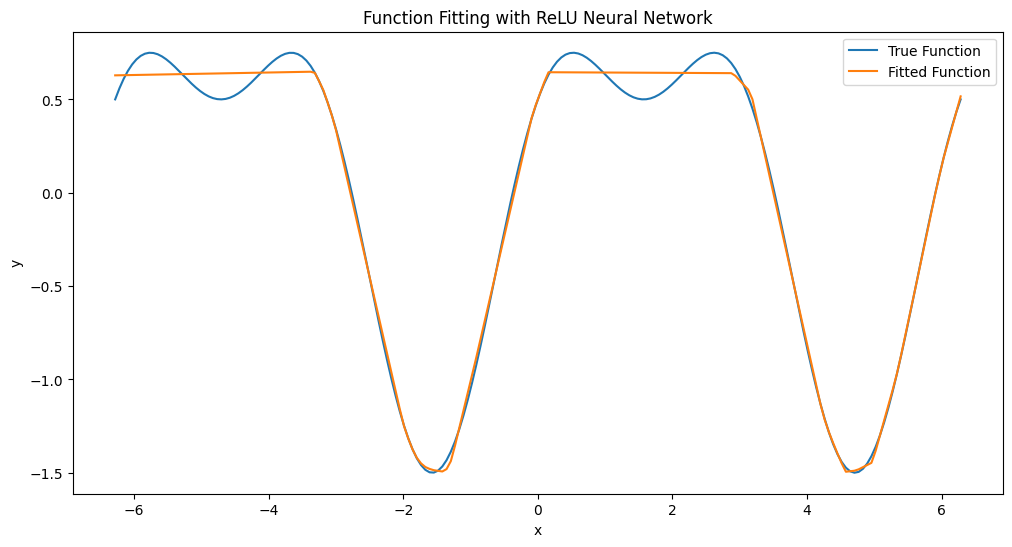

In [63]:
for epoch in range(1000):
    loss = train_one_step(model, optimizer,
                          tf.constant(train_x, dtype=tf.float32),
                          tf.constant(train_y, dtype=tf.float32))
    if epoch % 100 == 0:
        print('epoch', epoch, ': loss', loss.numpy())

test_loss = test(model,
                 tf.constant(test_x, dtype=tf.float32),
                 tf.constant(test_y, dtype=tf.float32))

print('test loss', test_loss.numpy())

# 进行预测
predictions = model(tf.constant(test_x, dtype=tf.float32)).numpy()

# 绘制拟合效果
plt.figure(figsize=(12, 6))
plt.plot(test_x, test_y, label='True Function')
plt.plot(test_x, predictions, label='Fitted Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Fitting with ReLU Neural Network')
plt.legend()
plt.show()